In [27]:
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objects as go
import plotly.express as px

In [28]:
import plotly.io as pio
# Set the default renderer to png as the data is huge and overwhelms the Javascript renderers
pio.renderers.default = 'png'
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'png'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

In [29]:
from rdkit.Chem import PandasTools

In [48]:
# gunzip the input as distance_finder.py can't currentlfy handle gzipped input
# This only needs doing once!

!if [ ! -f final_scored_agg.sdf ]; then gunzip -k final_scored_agg.sdf.gz; fi

In [6]:
# Run distance_finder.py to add distances to the points defined in points.txt
# This only needs doing once!

%run distance_finder.py -i final_scored_agg.sdf -p points.txt -o final_scored_agg_dist.sdf

XChem distances args:  Namespace(input='final_scored_agg.sdf', outfile='final_scored_agg_dist.sdf', points='points.txt')
Read points ['5.655', '1.497', '18.223']
Read points ['1.494', '-8.367', '18.574']
Read points ['13.034', '6.306', '25.232']
Read points ['8.543', '-0.647', '20.479']
Read points ['14.208', '5.879', '21.170']
Read points ['13.698', '-1.733', '22.648']
Read points ['5.425', '-5.764', '22.061']
Read points ['6.962', '-6.805', '29.414']
Found 8 atom points
Wrote 41582 molecules


In [31]:
df = PandasTools.LoadSDF('final_scored_agg_dist.sdf', molColName='Molecule')
df.shape

(41582, 86)

In [20]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

CHROM.0                                           object
CHROM.1                                           object
Cum_SuCOS_FeatureMap_Score                        object
Cum_SuCOS_Protrude_Score                          object
Cum_SuCOS_Score                                   object
Max_SuCOS_Cluster                                 object
Max_SuCOS_FeatureMap_Score                        object
Max_SuCOS_Index                                   object
Max_SuCOS_Protrude_Score                          object
Max_SuCOS_Score                                   object
Name                                              object
Protein_Target                                    object
RI                                                object
Rbt.Current_Directory                             object
Rbt.Executable                                    object
Rbt.Library                                       object
Rbt.Parameter_File                                object
Rbt.Receptor                   

In [32]:
# sod it! RDKit does not assing correct dtypes. We'll need to set them manually
# Not every column is converted - only onces we use

df = df.astype(dtype= {
    "Cum_SuCOS_FeatureMap_Score":"float64",
    "Cum_SuCOS_Protrude_Score":"float64",
    "Cum_SuCOS_Score":"float64",
    "Max_SuCOS_FeatureMap_Score":"float64",
    "Max_SuCOS_Protrude_Score":"float64",
    "Max_SuCOS_Score":"float64",
    "SCORE":"float64",
    "SCORE.norm":"float64",
    "TransFSScore":"float64",
    
    "score_Fulltrainingset_NNScore2.0":"float64",
    "score_Fulltrainingset_NNScore2.0-RDKit":"float64",
    "score_Fulltrainingset_RDKit":"float64",
    "score_Fulltrainingset_RF-Score":"float64",
    "score_Fulltrainingset_RF-Score-RDKit":"float64",
    "score_Fulltrainingset_RF-Scorev3":"float64",
    "score_Fulltrainingset_RF-Scorev3-RDKit":"float64",
    "score_Fulltrainingset_Vina":"float64",
    "score_Fulltrainingset_Vina-RDKit":"float64",

    "score_Target-awaretrainingset_NNScore2.0":"float64",
    "score_Target-awaretrainingset_NNScore2.0-RDKit":"float64",
    "score_Target-awaretrainingset_RDKit":"float64",
    "score_Target-awaretrainingset_RF-Score":"float64",
    "score_Target-awaretrainingset_RF-Score-RDKit":"float64",
    "score_Target-awaretrainingset_RF-Scorev3":"float64",
    "score_Target-awaretrainingset_RF-Scorev3-RDKit":"float64",
    "score_Target-awaretrainingset_Vina":"float64",
    "score_Target-awaretrainingset_Vina-RDKit":"float64",
    
    "score_Target-blindtrainingset_NNScore2.0":"float64",
    "score_Target-blindtrainingset_NNScore2.0-RDKit":"float64",
    "score_Target-blindtrainingset_RDKit":"float64",
    "score_Target-blindtrainingset_RF-Score":"float64",
    "score_Target-blindtrainingset_RF-Score-RDKit":"float64",
    "score_Target-blindtrainingset_RF-Scorev3":"float64",
    "score_Target-blindtrainingset_RF-Scorev3-RDKit":"float64",
    "score_Target-blindtrainingset_Vina":"float64",
    "score_Target-blindtrainingset_Vina-RDKit":"float64",

    "distance1":"float64",
    "distance2":"float64",
    "distance3":"float64",
    "distance4":"float64",
    "distance5":"float64",
    "distance6":"float64",
    "distance7":"float64",
    "distance8":"float64"
})

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

CHROM.0                                            object
CHROM.1                                            object
Cum_SuCOS_FeatureMap_Score                        float64
Cum_SuCOS_Protrude_Score                          float64
Cum_SuCOS_Score                                   float64
Max_SuCOS_Cluster                                  object
Max_SuCOS_FeatureMap_Score                        float64
Max_SuCOS_Index                                    object
Max_SuCOS_Protrude_Score                          float64
Max_SuCOS_Score                                   float64
Name                                               object
Protein_Target                                     object
RI                                                 object
Rbt.Current_Directory                              object
Rbt.Executable                                     object
Rbt.Library                                        object
Rbt.Parameter_File                                 object
Rbt.Receptor  

In [33]:
full_cols = [
    'score_Fulltrainingset_NNScore2.0',
    'score_Fulltrainingset_NNScore2.0-RDKit',
    'score_Fulltrainingset_RDKit',
    'score_Fulltrainingset_RF-Score',
    'score_Fulltrainingset_RF-Score-RDKit',
    'score_Fulltrainingset_RF-Scorev3',
    'score_Fulltrainingset_RF-Scorev3-RDKit',
    'score_Fulltrainingset_Vina',
    'score_Fulltrainingset_Vina-RDKit'
]

aware_cols = [
    'score_Target-awaretrainingset_NNScore2.0',
    'score_Target-awaretrainingset_NNScore2.0-RDKit',
    'score_Target-awaretrainingset_RDKit',
    'score_Target-awaretrainingset_RF-Score',
    'score_Target-awaretrainingset_RF-Score-RDKit',
    'score_Target-awaretrainingset_RF-Scorev3',
    'score_Target-awaretrainingset_RF-Scorev3-RDKit',
    'score_Target-awaretrainingset_Vina',
    'score_Target-awaretrainingset_Vina-RDKit'
]

blind_cols = [
    'score_Target-blindtrainingset_NNScore2.0',
    'score_Target-blindtrainingset_NNScore2.0-RDKit',
    'score_Target-blindtrainingset_RDKit',
    'score_Target-blindtrainingset_RF-Score',
    'score_Target-blindtrainingset_RF-Score-RDKit',
    'score_Target-blindtrainingset_RF-Scorev3',
    'score_Target-blindtrainingset_RF-Scorev3-RDKit',
    'score_Target-blindtrainingset_Vina',
    'score_Target-blindtrainingset_Vina-RDKit'
]


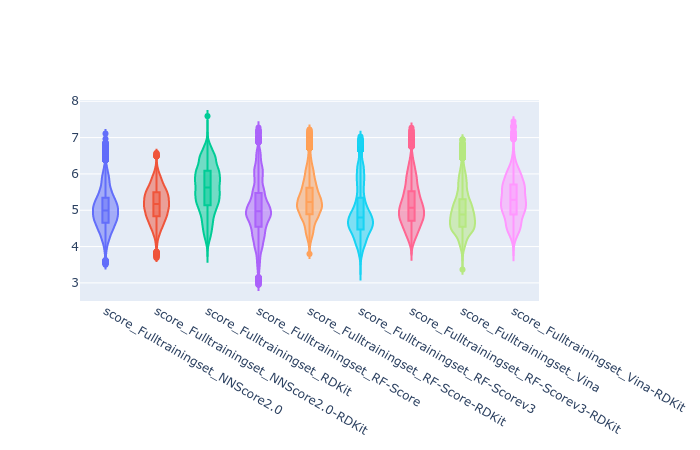

In [34]:
fig = go.Figure()
for col in full_cols:

    xs = []
    for i in range(df.shape[0]):
        xs.append(col)
    fig.add_trace(go.Violin(x=xs, y=df[col], box_visible=True, showlegend=False))
fig.show()

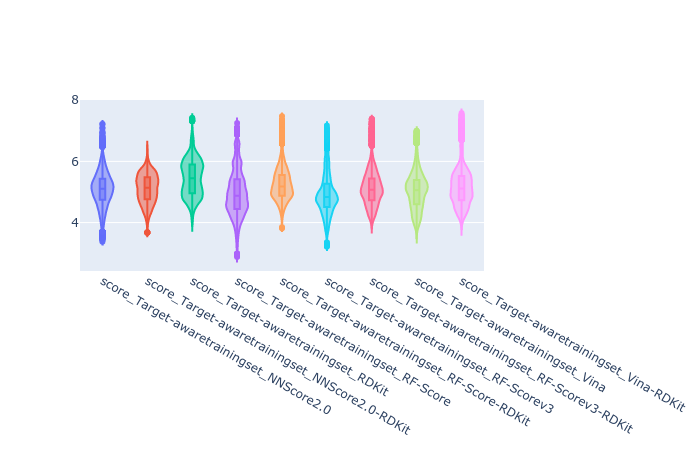

In [35]:
fig = go.Figure()
for col in aware_cols:

    xs = []
    for i in range(df.shape[0]):
        xs.append(col)
    fig.add_trace(go.Violin(x=xs, y=df[col], box_visible=True, showlegend=False))
fig.show()

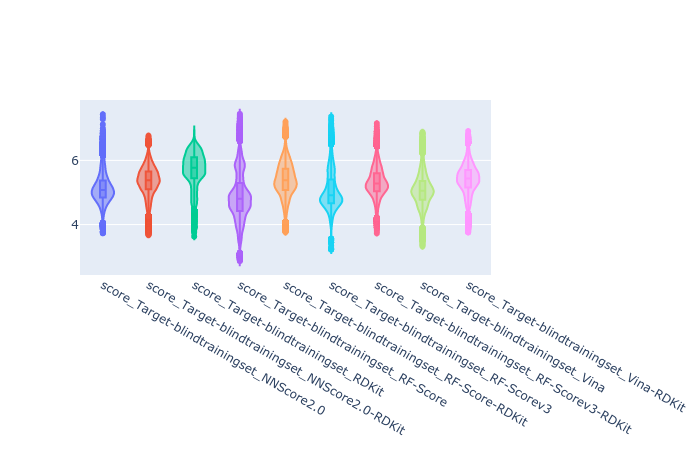

In [36]:
fig = go.Figure()
for col in blind_cols:

    xs = []
    for i in range(df.shape[0]):
        xs.append(col)
    fig.add_trace(go.Violin(x=xs, y=df[col], box_visible=True, showlegend=False))
fig.show()

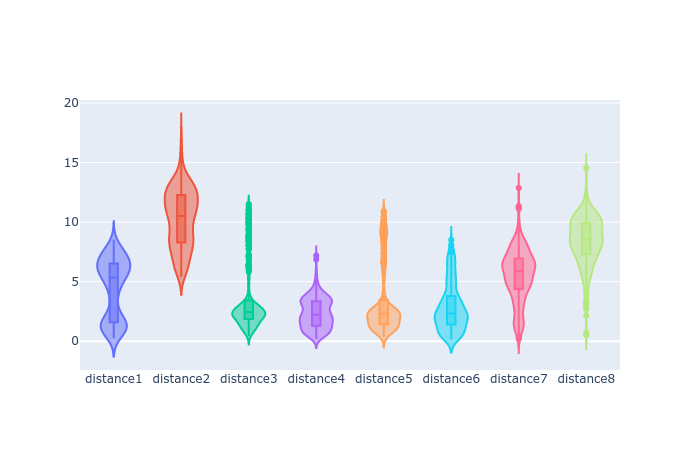

In [42]:
# distribution of all distances

# plot all distances

fig = go.Figure()
for i in range(1,9):
    k = "distance" + str(i)
    xs = []
    for i in range(500):
        xs.append(k)
    fig.add_trace(go.Violin(x=xs, y=df[k], box_visible=True, showlegend=False))
fig.show()

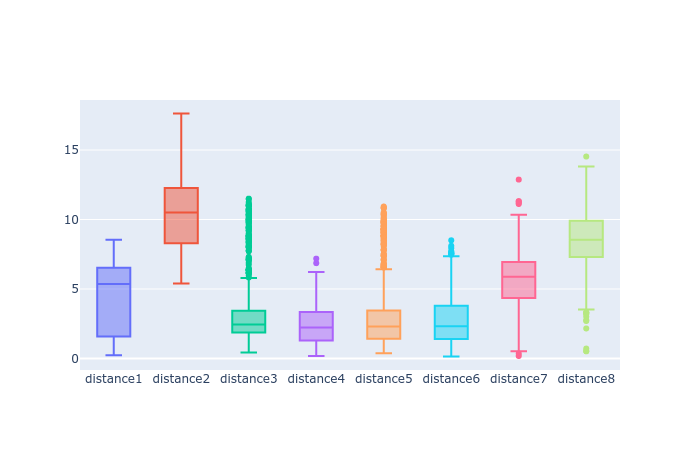

In [43]:
# distribution of all distances

# plot all distances

fig = go.Figure()
for i in range(1,9):
    k = "distance" + str(i)
    xs = []
    for i in range(500):
        xs.append(k)
    fig.add_trace(go.Box(x=xs, y=df[k], showlegend=False))
fig.show()

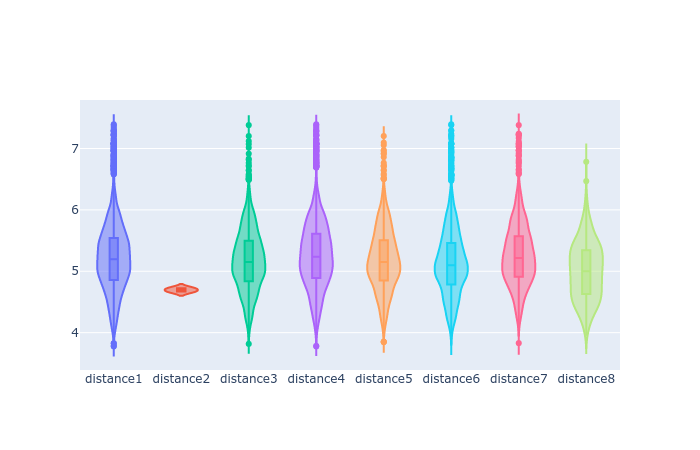

In [41]:
# distribution of scores of ligands grouped by being <2A from each of the points

fig = go.Figure()
for i in range(1,9):
    k = "distance" + str(i)
    df2 = df[df[k] < 2.0]

    xs = []
    for i in range(df2.shape[0]):
        xs.append(k)
    fig.add_trace(go.Violin(x=xs, y=df2['score_Target-awaretrainingset_RF-Scorev3-RDKit'], box_visible=True, showlegend=False))
fig.show()